# 例4.4.2

### 1.分步骤计算三次检验的结果

In [1]:
# 读入数据
library(readxl)
data = read_excel('.//AMSA_data//《应用多元统计分析》（第6版）Excel数据//examp4.4.2.xlsx')
data1 = subset(data, 总体=='1')[,1:4] # 丈夫对妻子
data2 = subset(data, 总体=='2')[,1:4] # 妻子对丈夫

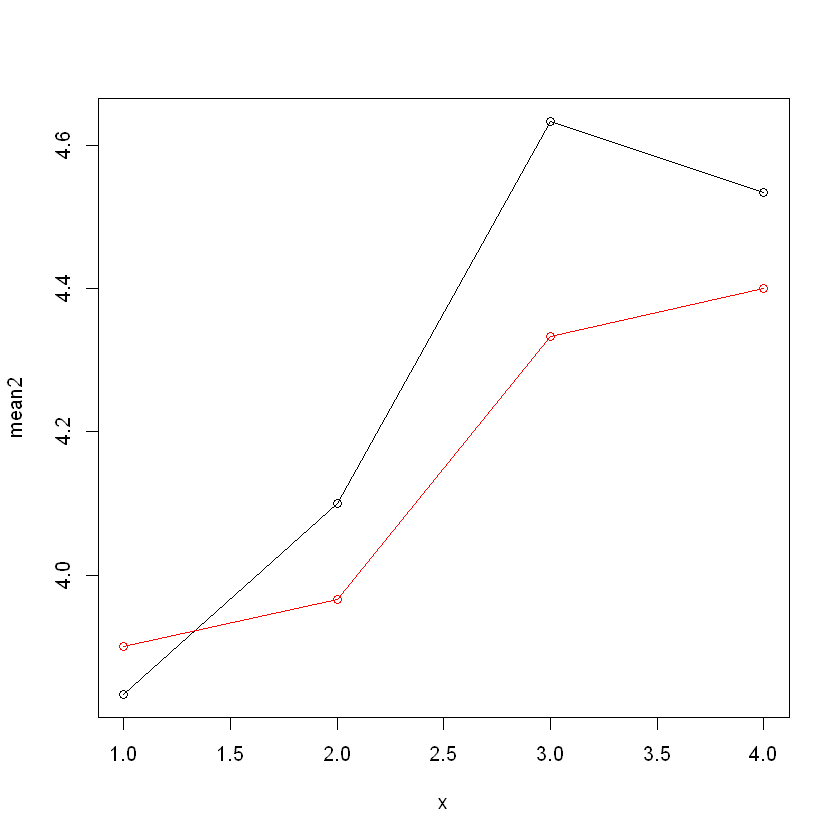

In [3]:
# 求均值和协方差矩阵的无偏估计
mean1 = apply(data1,2,mean)
mean2 = apply(data2,2,mean)

n1 = dim(data1)[1]
n2 = dim(data2)[1]
Sp = ((n1-1)*cov(data1)+(n2-1)*cov(data2))/(n1+n2-2)

# 绘图直观观察

x = c(1,2,3,4)
plot(x, mean2, type="l")
points(x,mean2)
lines(x, mean1, col="red")
points(x, mean1, col="red") # 红色表示丈夫对妻子的回答

In [34]:
# 检验轮廓平行性
C =  rbind(c(-1,1,0,0),c(0,-1,1,0),c(0,0,-1,1))
T2 = (n1*n2/(n1+n2))*t(C%*%(mean1-mean2))%*%solve(C%*%Sp%*%t(C))%*%(C%*%(mean1-mean2))
a = 0.05 # 显著性水平
p = 4 # 维度
Ta2 = (p-1)*(n1+n2-2)/(n1+n2-p)*qf(a, df1 = p-1, df2 = n1+n2-p, lower.tail = FALSE) # 临界值法
p1 = pf(T2/((p-1)*(n1+n2-2)/(n1+n2-p)), df1 = p-1, df2 = n1+n2-p, lower.tail = FALSE) # P值法
print(sprintf('(1)轮廓平行假设的p值为：%f',p1))
if (p1>a) print('不能拒绝两总体的轮廓是平行的假设') else print('拒绝两总体的轮廓是平行的假设，检验结束')

[1] "(1)轮廓平行假设的p值为：0.062559"

[1] "不能拒绝两总体的轮廓是平行的假设"


简单分析：根据图片来看，两者确实存在一定的趋势相似性

In [33]:
# 检验轮廓是否重合
I = c(1,1,1,1) # 生成单位矩阵
T21 = n1*n2/(n1+n2)*((t(I)%*%(mean1-mean2))^2)/(t(I)%*%Sp%*%I)
F2 = qf(a, df1 = 1, df2 = n1+n2-2, lower.tail = FALSE) # 临界值法
p2 = pf(T21,df1 = 1, df2 = n1+n2-2, lower.tail = FALSE) # P值法
print(sprintf('(2)轮廓重合假设的p值为：%f',p2))
if (p2>a) print('不能拒绝两总体的轮廓是重合的假设，即两者没有显著差异') else print('拒绝两总体的轮廓是重合的假设，检验结束')

[1] "(2)轮廓重合假设的p值为：0.220685"

[1] "不能拒绝两总体的轮廓是重合的假设，即两者没有显著差异"


简单分析：说明丈夫对妻子和妻子对丈夫的回答没有显著差异

In [32]:
# 共同轮廓水平假设
z = rbind(data1,data2) # 合并
n = dim(z)[1]
S = cov(z) # 新样本协方差矩阵
T22 = (n1+n2)*t(0.5*C%*%(mean1+mean2))%*%(solve(C%*%S%*%t(C)))%*%(0.5*C%*%(mean1+mean2))
Ta22 = (p-1)*(n1+n2-1)/(n1+n2-p+1)*qf(a, df1 = p-1, df2 = n1+n2-p+1, lower.tail = FALSE) # 临界值法
p3 = pf(T22/((p-1)*(n1+n2-1)/(n1+n2-p+1)),df1 = p-1, df2 = n1+n2-p+1, lower.tail = FALSE) # P值法
print(sprintf('(3)共同轮廓水平假设的p值为：%f',p3))
if (p3<a) print('拒绝共同轮廓是水平的假设，即在不同方面水平有显著差异') else print('不能拒绝共同轮廓是水平的假设，不同方面没有显著差异')

[1] "(3)共同轮廓水平假设的p值为：0.000155"

[1] "拒绝共同轮廓是水平的假设，即在不同方面水平有显著差异"


简单分析：说明妻子和丈夫作为整体而言，对于四个问题的回答的得分水平有显著的差异。

### 2.封装为一个函数，并实现文件调用

[1] "(1)轮廓平行假设的p值为：0.062559"
[1] "不能拒绝两总体的轮廓是平行的假设"
[1] "(2)轮廓重合假设的p值为：0.220685"
[1] "不能拒绝两总体的轮廓是重合的假设，即两者没有显著差异"
[1] "(3)共同轮廓水平假设的p值为：0.000155"
[1] "拒绝共同轮廓是水平的假设，即在不同方面水平有显著差异"


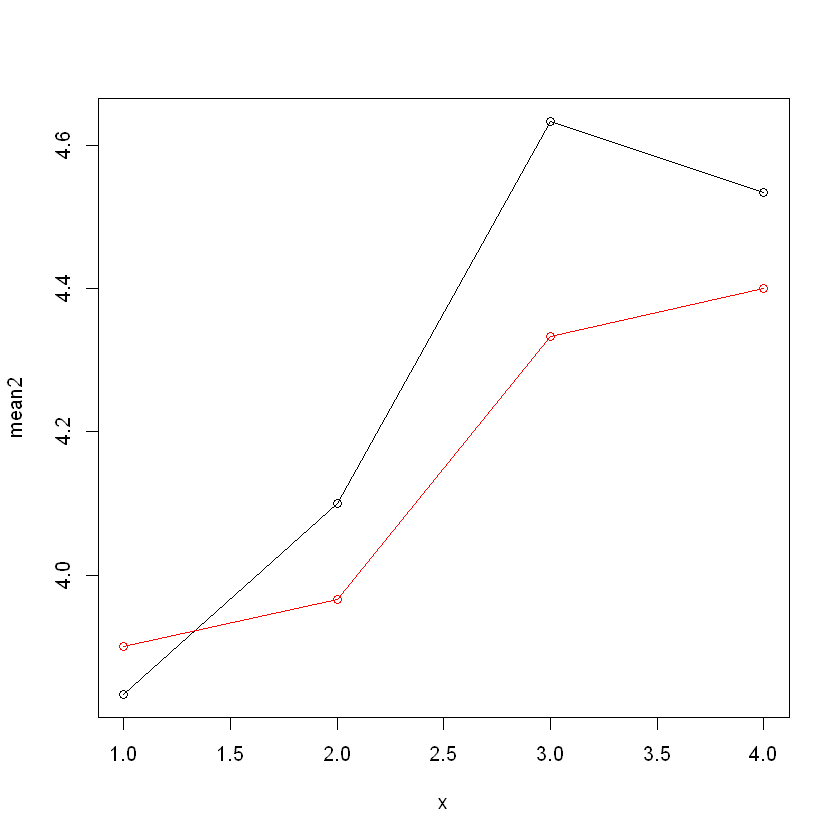

In [41]:
lunkuo = function(data1,data2){
    # 求均值和协方差矩阵的无偏估计
    mean1 = apply(data1,2,mean)
    mean2 = apply(data2,2,mean)

    n1 = dim(data1)[1]
    n2 = dim(data2)[1]
    Sp = ((n1-1)*cov(data1)+(n2-1)*cov(data2))/(n1+n2-2)

    # 绘图直观观察

    x = c(1,2,3,4)
    plot(x, mean2, type="l")
    points(x,mean2)
    lines(x, mean1, col="red")
    points(x, mean1, col="red") # 红色表示丈夫对妻子的回答

    # 检验轮廓平行性
    C =  rbind(c(-1,1,0,0),c(0,-1,1,0),c(0,0,-1,1))
    T2 = (n1*n2/(n1+n2))*t(C%*%(mean1-mean2))%*%solve(C%*%Sp%*%t(C))%*%(C%*%(mean1-mean2))
    a = 0.05 # 显著性水平
    p = 4 # 维度
    Ta2 = (p-1)*(n1+n2-2)/(n1+n2-p)*qf(a, df1 = p-1, df2 = n1+n2-p, lower.tail = FALSE) # 临界值法
    p1 = pf(T2/((p-1)*(n1+n2-2)/(n1+n2-p)), df1 = p-1, df2 = n1+n2-p, lower.tail = FALSE) # P值法
    print(sprintf('(1)轮廓平行假设的p值为：%f',p1))
    if (p1>a) print('不能拒绝两总体的轮廓是平行的假设') else {return('拒绝两总体的轮廓是平行的假设，检验结束')}
    
    # 检验轮廓是否重合
    I = c(1,1,1,1) # 生成单位矩阵
    T21 = n1*n2/(n1+n2)*((t(I)%*%(mean1-mean2))^2)/(t(I)%*%Sp%*%I)
    F2 = qf(a, df1 = 1, df2 = n1+n2-2, lower.tail = FALSE) # 临界值法
    p2 = pf(T21,df1 = 1, df2 = n1+n2-2, lower.tail = FALSE) # P值法
    print(sprintf('(2)轮廓重合假设的p值为：%f',p2))
    if (p2>a) print('不能拒绝两总体的轮廓是重合的假设，即两者没有显著差异') else {return('拒绝两总体的轮廓是重合的假设，检验结束')}

    # 共同轮廓水平假设
    z = rbind(data1,data2) # 合并
    n = dim(z)[1]
    S = cov(z) # 新样本协方差矩阵
    T22 = (n1+n2)*t(0.5*C%*%(mean1+mean2))%*%(solve(C%*%S%*%t(C)))%*%(0.5*C%*%(mean1+mean2))
    Ta22 = (p-1)*(n1+n2-1)/(n1+n2-p+1)*qf(a, df1 = p-1, df2 = n1+n2-p+1, lower.tail = FALSE) # 临界值法
    p3 = pf(T22/((p-1)*(n1+n2-1)/(n1+n2-p+1)),df1 = p-1, df2 = n1+n2-p+1, lower.tail = FALSE) # P值法
    print(sprintf('(3)共同轮廓水平假设的p值为：%f',p3))
    if (p3<a) print('拒绝共同轮廓是水平的假设，即在不同方面水平有显著差异') else print('不能拒绝共同轮廓是水平的假设，不同方面没有显著差异')
}

lunkuo(data1,data2)

还可以将函数封装为一个文件，以便其余文件也能调用。方法是，将函数单独编辑在一个文件中，文件名为函数名。在使用时，执行代码“source(函数名.R)”载入，之后就可以使用函数了。 

[1] "(1)轮廓平行假设的p值为：0.062559"
[1] "不能拒绝两总体的轮廓是平行的假设"
[1] "(2)轮廓重合假设的p值为：0.220685"
[1] "不能拒绝两总体的轮廓是重合的假设，即两者没有显著差异"
[1] "(3)共同轮廓水平假设的p值为：0.000155"
[1] "拒绝共同轮廓是水平的假设，即在不同方面水平有显著差异"


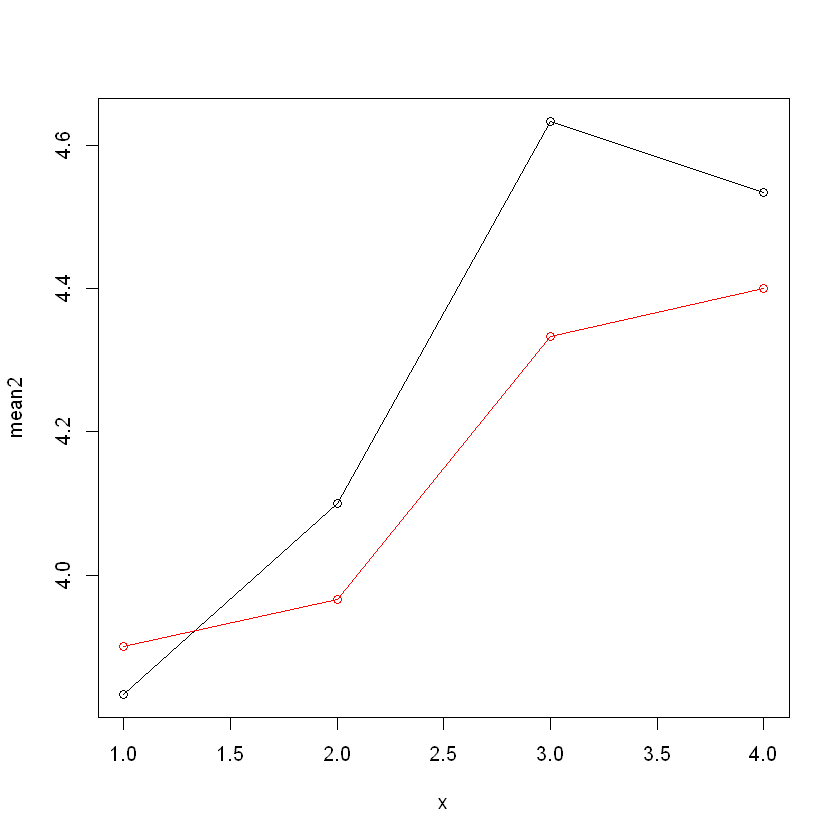

In [6]:
source('lunkuo.R',encoding = "utf-8") # 这里需要改一下编码格式
lunkuo(data1,data2)